# ARIMA dataset= Temperature dataset

In [30]:
#Load the linraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import statsmodels.api as sm

In [13]:
#Load the dataset
df=pd.read_csv("Temp_Data.csv",index_col="DATE",parse_dates=True)

In [14]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 524 entries, 2020-01-01 to 2021-06-07
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp               524 non-null    float64
 1   relative_humidity  524 non-null    float64
 2   wind_speed         524 non-null    float64
 3   Pressure           524 non-null    float64
dtypes: float64(4)
memory usage: 20.5 KB


In [15]:
df=df[["Temp"]]

In [16]:
#EDA (Head)
df.head()

,Temp
DATE,
2020-01-01,-0.44
2020-01-02,-0.09
2020-01-03,2.95
2020-01-04,-0.80
2020-01-05,-7.95


In [17]:
#EDA (Shape)
df.shape

(524, 1)

In [18]:
#EDA (Size)
df.size

524

In [19]:
#EDA (Describe)
df.describe()

,Temp
count,524.000000
mean,5.696603
std,11.305643
min,-20.900000
25%,-2.487500
50%,5.525000
75%,14.572500
max,28.900000


<AxesSubplot:xlabel='DATE'>

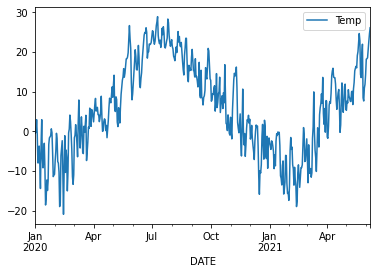

In [20]:
#Data visulization
df.plot()

In [21]:
#Seasonal decompse
SD=seasonal_decompose(df)

<AxesSubplot:xlabel='DATE'>

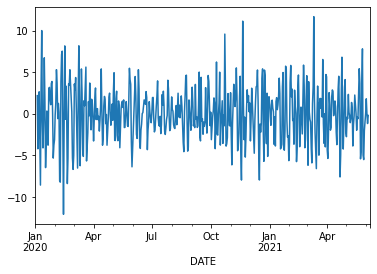

In [22]:
#SD residual plot
SD.resid.plot()

<AxesSubplot:xlabel='DATE'>

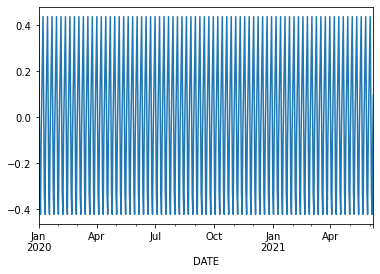

In [23]:
#SD Seasonal plot
SD.seasonal.plot()

<AxesSubplot:xlabel='DATE'>

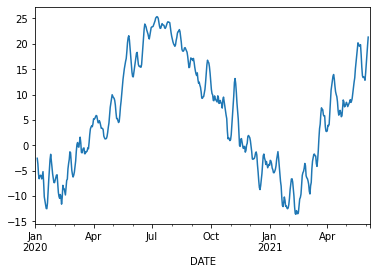

In [26]:
#SD trend plot
SD.trend.plot()

In [33]:
#Train test split
Train=df.iloc[:510,0]
Test=df.iloc[510:,0]

In [27]:
#Finding the parameters related to ARIMS
AA=auto_arima(df,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2846.718, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2929.050, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.026, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.983, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2927.135, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2845.685, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2856.303, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2882.045, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2846.604, Time=0.41 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2848.805, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2858.051, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2848.587, Time=0.71 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2844.520, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2854.723, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [40]:
#Model Building
#Instanciate
Arima=sm.tsa.ARIMA(Train,order=(1,1,2))
#Fit
Arima=Arima.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [42]:
#Summary
Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                  510
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1378.671
Date:                Wed, 08 Mar 2023   AIC                           2765.341
Time:                        11:00:14   BIC                           2782.271
Sample:                    01-01-2020   HQIC                          2771.979
                         - 05-24-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.077      4.216      0.000       0.173       0.474
ma.L1         -0.3850      0.074     -5.223      0.000      -0.529      -0.240
ma.L2         -0.4007      0.046     -8.772      0.000      -0.490      -0.311
sigma2        13.1715      0.809     16.284      0.000      11.586      14.757
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.47
Prob(Q):                              0.88   Prob(JB):                         0.29
Heteroskedasticity (H):               1.03   Skew:                            -0.14
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
#Prediction
prediction=Arima.predict(start=len(Train),end=len(Train)+len(Train)-1,type="level")

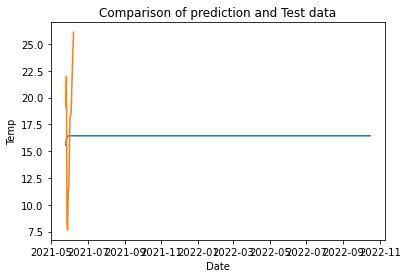

In [45]:
#Plot of prediction and test data
plt.plot(prediction)
plt.plot(Test)
plt.title("Comparison of prediction and Test data")
plt.ylabel("Temp")
plt.xlabel("Date")
plt.show();

In [46]:
#Performance parameters
print(prediction.mean())
print(Test.mean())

16.43212656003426
17.405714285714286


Concluison=Good performance as the mean of prediction and mean of test data is close. 

# Thank You